<a href="https://colab.research.google.com/github/yuta-kanematsu/TU_math_study/blob/main/Deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
#Iris datasets
import numpy 
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


iris = load_iris()

x = iris.data
Y = (iris.target==0).astype(int)

train_x, test_x, train_Y, test_Y = train_test_split(x, Y, test_size=0.3, random_state=42, shuffle=True)

perc_clf = Perceptron()
perc_clf.fit(train_x, train_Y)

predictions = perc_clf.predict(test_x)

print('Accuracy:'+str(accuracy_score(test_Y, predictions)))

Accuracy:1.0


In [18]:
#Multi layer percptron
from sklearn.neural_network import MLPClassifier

iris = load_iris()

x = iris.data
Y = iris.target

train_x, test_x, train_Y, test_Y = train_test_split(x, Y, test_size=0.3, random_state=42, shuffle=True)

mlp_clsf = MLPClassifier((10,10), activation='relu', learning_rate='constant', learning_rate_init=0.001, max_iter=1000, random_state=42)
mlp_clsf.fit(train_x, train_Y)
predictions = mlp_clsf.predict(test_x)
print('Accuracy:'+str(accuracy_score(test_Y, predictions)))


Accuracy:0.9777777777777777


In [19]:
mlp_clsf.predict_proba(test_x[0].reshape(1, -1)).sum()

1.0

In [20]:
#MLP regression
from sklearn.datasets import load_boston
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

dataset = load_boston()

x = dataset['data']
Y = dataset['target']

train_x, test_x, train_Y, test_Y = train_test_split(x, Y, test_size=0.3, random_state=42, shuffle=True)

mlp_reg = MLPRegressor((10,10), activation='relu', learning_rate='constant', learning_rate_init=0.001, max_iter=3000, random_state=42)
mlp_reg.fit(train_x, train_Y)
predictions = mlp_reg.predict(test_x)

error = mean_squared_error(test_Y, predictions) ** (1/2)
print('RMSE:'+str(error))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

RMSE:4.699377521565086


In [21]:
#Regression using Keras
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

house_price = keras.datasets.boston_housing
(train_x, train_Y),(test_x, test_Y) = house_price.load_data()
train_x, valid_x, train_Y, valid_Y = train_test_split(train_x, train_Y)

scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
valid_x = scaler.fit_transform(valid_x)
test_x = scaler.fit_transform(test_x)

keras_model = keras.models.Sequential()
keras_model.add(tf.keras.Input(shape=train_x.shape[1:],))
keras_model.add(tf.keras.layers.Dense(30, activation='relu'))
keras_model.add(tf.keras.layers.Dense(1))

keras_model.summary()

keras_model.compile(loss='mean_squared_error', optimizer='sgd', metrics=[tf.keras.metrics.RootMeanSquaredError(name='root_mean_squared_error', dtype=None)])
history = keras_model.fit(train_x, train_Y, epochs=70, validation_data=(valid_x, valid_Y))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 30)                420       
                                                                 
 dense_5 (Dense)             (None, 1)                 31        
                                                                 
Total params: 451
Trainable params: 451
Non-trainable params: 0
_________________________________________________________________
Epoch 1/70
10/10 [==============================] - 1s 37ms/step - loss: 196.6545 - root_mean_squared_error: 14.0234 - val_loss: 38.6460 - val_root_mean_squared_error: 6.2166
Epoch 2/70
10/10 [==============================] - 0s 11ms/step - loss: 29.2416 - root_mean_squared_error: 5.4076 - val_loss: 16.5501 - val_root_mean_squared_error: 4.0682
Epoch 3/70
10/10 [==============================] - 0s 10ms/step - loss: 18.5150 - root_mean_squared_err

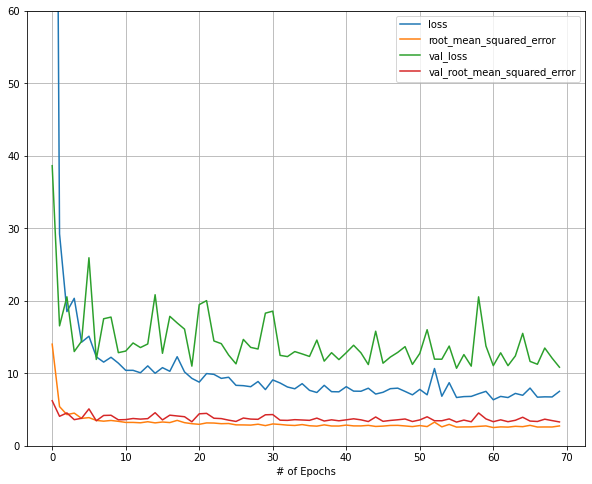

4.333327689591115

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(10, 8))
plt.grid(True)
plt.gca().set_ylim(0,60)
plt.xlabel('# of Epochs')
plt.show()

mean_squared_error(test_Y, keras_model.predict(test_x))**(1/2)

In [23]:
#Classificaton using Keras
(train_x, train_Y), (test_x, test_Y) = tf.keras.datasets.mnist.load_data(path='mnist.npz')

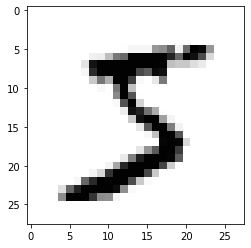

In [24]:
from matplotlib import pyplot as plt
plt.imshow(train_x[0], cmap='Greys')
plt.show()

In [25]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

train_x, valid_x, train_Y, valid_Y = train_test_split(train_x, train_Y)

train_x = train_x / 255.0
valid_x = valid_x / 255.0
test_x = test_x / 255.0

keras_clf = keras.models.Sequential()
keras_clf.add(keras.layers.Flatten(input_shape=[28,28]))
keras_clf.add(keras.layers.Dense(10, activation='softmax'))

keras_clf.summary()
keras_clf.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
history = keras_clf.fit(train_x, train_Y, epochs=20, validation_data=(valid_x, valid_Y))


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1407/1407 [==============================] - 4s 3ms/step - loss: 0.8582 - accuracy: 0.7985 - val_loss: 0.5569 - val_accuracy: 0.8636
Epoch 2/20
1407/1407 [==============================] - 4s 3ms/step - loss: 0.4908 - accuracy: 0.8749 - val_loss: 0.4616 - val_accuracy: 0.8789
Epoch 3/20
1407/1407 [==============================] - 4s 3ms/step - loss: 0.4277 - accuracy: 0.8867 - val_loss: 0.4218 - val_accuracy: 0.8850
Epoch 4/20
1407/

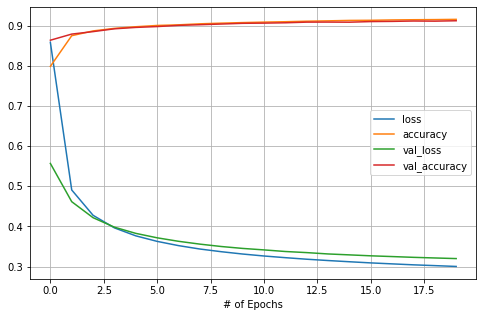

In [26]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca()
plt.xlabel('# of Epochs')
plt.show()

In [27]:
from sklearn.metrics import accuracy_score
print('Accuracy: ' + str(accuracy_score(test_Y, keras_clf.predict(test_x).argmax(axis=-1))))

Accuracy: 0.9171


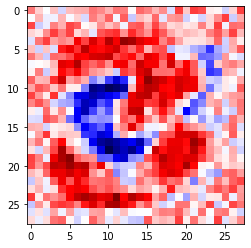

In [28]:
import numpy as np
plt.imshow(np.reshape(keras_clf.get_weights()[0][:,3],(28,28)), cmap='seismic')